**VIDEO ANALYSIS OF A PROJECTILE(Cannon Ball) TO CALCULATE RANGE,MAX HIEGHT,HORIZANTAL VELOCITY,ACCELERATION DUE TO GRAVITY (g):**
***

**<br>1)The video of a ball fired at an angle 60 degrees, with a background curtain is recorded at 266.3FPS with a scale of 797 pixels/meter.
Through out the analysis we take distance in Pixels and each frame as an unit of time. And in the end, we convert them to SI units.<br>
<br>2)To analyse the motion of the ball, we have to take its pixel intensity into account, but that intensity was disturbed by a hole in the curtain. <br>
<br>3)To remove the hole in the video frames, we found the peak brightness of the hole to be 100.Therefore we converted any intensity values upto 100 as black, and more than that as white,hence eliminated the hole.
So all pixles with intensity value >100 are treated as the ball.<br>
<br>4)We calculate the midpoint of the ball pixels as its center of gravity and we get its co-ordinates.We got those co-ordinates starting from frame no.186 and ending at frame no.362. But frame no.186 does not have the launch origin which is required to calculate the Range.<br>
<br>5)So,we draw a plot of frame no. vs Slope to see which frame number matches the slope tan 60 degrees(launch angle) found to be frame no.179.
Next we plot X vs frame no. and Y  vs frame no. seperately to get the (x,y) co-ordinates in frame no.179 which is ofcourse our launch origin found to be (6,-65).<br>
<br>6)If the launch origin is at y=-65, then the horizantal range is found by knowing X co-ordinates corresponding to y=-65 by solving the quadratic equation of the projectile obtained by the plot and getting the roots X1 and X2. The Range of Projectile = X2-X1= 1138 Pixels.<br>
<br>7)The Y co-ordinate at the midpoint of the Range is the Maximum Height, therefore we substitute (X1+X2)/2 in the quadratic equation of the projectile which gave Y=434.784 Pixels as the Maximum Height reached.<br>
<br>8)The graph delta X vs Frame no. gives the constant horizantal velocity of the projectile = 5.7652 Pixels/Frame which is supposed to be a straight line parallel to Horizantal axis.<br>
<br>9)The graph delta Y vs Frame no. gives the vertical velocity which is ofcourse changing with time. This graph is a straight line cutting the axes. And the slope of velocity vs time graph(delta Y vs Frame No.graph) gives acceleration, which in this case is due to gravity. The slope of this graph is found to be 0.110031 Pixel/Frame squared which converted to SI units is 9.79 meter/second squared.<br>
<br>10)Hence, all the required results are obtained.<br>**

 **CELL1: EXTRACTING FRAMES FROM THE VIDEO AND CROPPING IT AND CONVERTING IT INTO GRAY SCALE**

 In this cell, we defined a function to extract frames from the video path which are a total of 0 to 625 frames. Then each frame is cropped starting at (70,90) as the pivot with horizantal 1140 pixels crop and vertical 450 pixels crop. The cropped frames are then converted into Grayscale.In the end, you can enter the frame number in "plt.imshow(bw_frames[ ])" to see its picture.


frames cropped and extracted and stored in bw_frames


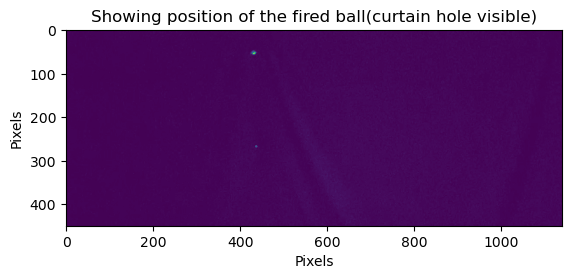

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt



def extract_frames(video_path):
    """
    Extracts frames from a video file.

    Parameters:
        video_path (str): The path to the video file.

    Returns:
        list: A list containing the extracted frames.
    """
    # Open the video file for reading
    cap = cv2.VideoCapture(video_path)
    # Get the total number of frames in the video
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Create an empty list to store the frames
    frames = []

    for i in range(frame_count):  # Iterate over each frame in the video
        ret, frame = cap.read()   # Read the frame from the video

        if ret:                    # Check if the frame was successfully read
            frames.append(frame)   # Add the frame to the list


    cap.release()   # Release the video file
    return frames




def crop_frames(frames, x, y, width, height):
    """
    Crops frames based on the specified dimensions.

    Parameters:
        frames (list): A list of frames to be cropped.
        x (int): The x-coordinate of the top-left corner of the crop.
        y (int): The y-coordinate of the top-left corner of the crop.
        width (int): The width of the crop.
        height (int): The height of the crop.

    Returns:
        list: A list containing the cropped frames.
    """
    cropped_frames = [] # Create an empty list to store the cropped frames

    for frame in frames: # Iterate over each frame in the input list
        cropped_frame = frame[y:y+height, x:x+width] # Crop the frame based on the specified dimensions
        cropped_frames.append(cropped_frame)  # Add the cropped frame to the list

    return cropped_frames # Return the cropped frames

def convert_to_bw(frames):
    """
    Converts frames to black and white (grayscale).

    Parameters:
        frames (list): A list of frames to be converted.

    Returns:
        list: A list containing the converted black and white frames.
    """
    bw_frames = [] # Create an empty list to store the black and white frames

    for frame in frames: # Iterate over each frame in the input list
        bw_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Convert the frame to black and white (grayscale)
        bw_frames.append(bw_frame) # Add the black and white frame to the list

    return bw_frames # Return the black and white frames

# Specified the path to the video file
video_path = 'video.mp4'

# Specified the cropping dimensions
x = 70  # x-coordinate of the top-left corner of the crop
y = 90  # y-coordinate of the top-left corner of the crop
width = 1140  # width of the crop
height = 450  # height of the crop


# Extracting frames from the video
frames = extract_frames(video_path)

# Cropping the frames
cropped_frames = crop_frames(frames, x, y, width, height)

# Converting the cropped frames to black and white
bw_frames = convert_to_bw(cropped_frames)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Showing position of the fired ball(curtain hole visible)')
plt.imshow(bw_frames[250]) #Enter any frame number here to see the position of the ball,with also a hole in the curtain.

print("frames cropped and extracted and stored in bw_frames")

**CELL2: FINDING PIXEL INTENSITIES OF THE HOLE IN THE VIDEO**

The coordinates and dimensions of the region of interest (ROI) within the video frame are defined. The roi_x and roi_y represent the top-left corner of the rectangle, while roi_width and roi_height represent the width and height of the rectangle, respectively.

We initialized an empty list called pixel_values to store the pixel intensity values and the code loops over each frame in the bw_frames (gray scale).

For each frame, we extract the region of interest (ROI) using array slicing based on the defined coordinates and dimensions.

The pixel intensities in the ROI are flattened (converted to a 1D array) and appended to the pixel_values list.

After processing all frames,  numpy.histogram function is used to calculate the histogram of pixel intensities. The pixel_values list is passed as input, along with the number of bins (256) and the range of pixel intensities ([0, 256]).

The maximum pixel intensity in the pixel_values list is printed using the max function.

Finally, the histogram is plotted using matplotlib.pyplot.hist function. The pixel_values and bin_edges are passed as inputs to create the histogram plot.


Maximum pixel intensity in the hole :
98


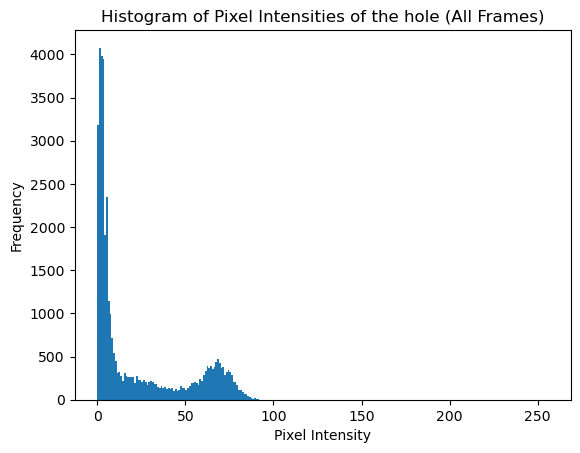

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Defined the region of interest ROI.
roi_x = 433  # X-coordinate of the top-left corner of the rectangle
roi_y = 264  # Y-coordinate of the top-left corner of the rectangle
roi_width = 8  # Width of the rectangle
roi_height = 8  # Height of the rectangle

pixel_values = []

# Processing each frame of the video

for frame in bw_frames:
    # Extracting the region of interest ROI
    roi = frame[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

    # Accumulating pixel intensity values
    pixel_values.extend(roi.flatten())



# Calculating the histogram of pixel intensities using NumPy
histogram, bin_edges = np.histogram(pixel_values, bins=256, range=[0, 256])
print("Maximum pixel intensity in the hole :")
print(max(pixel_values))
# Plotting the histogram
plt.hist(pixel_values,bin_edges )
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities of the hole (All Frames)')
plt.show()


**CELL3: FINDING MIDPOINTS OF THE BALL IN EACH FRAME**

The function initializes an empty list called midpoint_list to store the midpoint coordinates and iterates over each frame in the frames list using the enumerate function, which provides both the frame and its corresponding index.

For each frame, it applies a threshold to convert the image to binary (black and white) using the cv2.threshold function. The threshold value is set to 100, and pixels above this threshold are set to 255 (white), while pixels below are set to 0 (black). The result is stored in the binary variable.

We used numpy.nonzero function to get the coordinates of the white (ball) pixels in the binary image. The resulting y_coords and x_coords are numpy arrays representing the row and column indices of the white pixels, respectively.

If there are white pixels (indicating the presence of the ball) in the image, the code proceeds to find the starting and ending pixels of the ball in each direction.

The top-left corner of the ball's bounding rectangle is determined by finding the minimum x-coordinate (np.min(x_coords)) and the minimum y-coordinate (np.min(y_coords)).

The bottom-right corner of the bounding rectangle is determined by finding the maximum x-coordinate (np.max(x_coords)) and the maximum y-coordinate (np.max(y_coords)).

The midpoint of the ball is calculated by taking the average of the x-coordinates and the y-coordinates of the starting and ending pixels.

The calculated midpoint (index, int(midpoint_x), 450 - int(midpoint_y)) is printed to the console, where index represents the frame index, int(midpoint_x) is the x-coordinate of the midpoint, and 450 - int(midpoint_y) is the y-coordinate of the midpoint (the 450 is subtracted from the y-coordinate to invert the y-axis).

The midpoint coordinates are appended to the midpoint_list as a tuple.

If no ball pixels are found in the image, (index, 0, 0) is printed to the console to indicate a missing midpoint.

After iterating over all frames, the function returns the midpoint_list containing the midpoint coordinates for each frame.

The function is called with the bw_frames list as input, and the resulting midpoint coordinates are stored in the midpoints variable.


(0, 0, 0)
(1, 0, 0)
(2, 0, 0)
(3, 0, 0)
(4, 0, 0)
(5, 0, 0)
(6, 0, 0)
(7, 0, 0)
(8, 0, 0)
(9, 0, 0)
(10, 0, 0)
(11, 0, 0)
(12, 0, 0)
(13, 0, 0)
(14, 0, 0)
(15, 0, 0)
(16, 0, 0)
(17, 0, 0)
(18, 0, 0)
(19, 0, 0)
(20, 0, 0)
(21, 0, 0)
(22, 0, 0)
(23, 0, 0)
(24, 0, 0)
(25, 0, 0)
(26, 0, 0)
(27, 0, 0)
(28, 0, 0)
(29, 0, 0)
(30, 0, 0)
(31, 0, 0)
(32, 0, 0)
(33, 0, 0)
(34, 0, 0)
(35, 0, 0)
(36, 0, 0)
(37, 0, 0)
(38, 0, 0)
(39, 0, 0)
(40, 0, 0)
(41, 0, 0)
(42, 0, 0)
(43, 0, 0)
(44, 0, 0)
(45, 0, 0)
(46, 0, 0)
(47, 0, 0)
(48, 0, 0)
(49, 0, 0)
(50, 0, 0)
(51, 0, 0)
(52, 0, 0)
(53, 0, 0)
(54, 0, 0)
(55, 0, 0)
(56, 0, 0)
(57, 0, 0)
(58, 0, 0)
(59, 0, 0)
(60, 0, 0)
(61, 0, 0)
(62, 0, 0)
(63, 0, 0)
(64, 0, 0)
(65, 0, 0)
(66, 0, 0)
(67, 0, 0)
(68, 0, 0)
(69, 0, 0)
(70, 0, 0)
(71, 0, 0)
(72, 0, 0)
(73, 0, 0)
(74, 0, 0)
(75, 0, 0)
(76, 0, 0)
(77, 0, 0)
(78, 0, 0)
(79, 0, 0)
(80, 0, 0)
(81, 0, 0)
(82, 0, 0)
(83, 0, 0)
(84, 0, 0)
(85, 0, 0)
(86, 0, 0)
(87, 0, 0)
(88, 0, 0)
(89, 0, 0)
(90, 0, 0)
(91, 0, 0

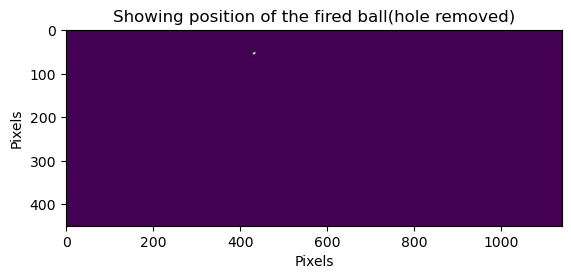

In [ ]:
def find_ball_midpoints(frames):

    """
    Find the midpoints of a ball in a series of frames.

    Args:
        frames (list): A list of frames representing the video frames.

    Returns:
        list: A list of tuples containing the midpoint coordinates for each frame.

    """
    midpoint_list = [] # List to store the midpoint coordinates

    for index, frame in enumerate(frames):

           # Applying a threshold to convert the image to binary (black and white)
           _, binary = cv2.threshold(frame, 100, 255, cv2.THRESH_BINARY)

           if index == 250: #Enter any frame number here to see the position of the ball, with hole in the curtain eliminated
              plt.xlabel('Pixels')
              plt.ylabel('Pixels')
              plt.title('Showing position of the fired ball(hole removed)')
              plt.imshow(binary)

           y_coords, x_coords = np.nonzero(binary) # Getting the coordinates of the ball pixels

           if len(y_coords) > 0:


                # Finding the starting pixels in each direction
               top_pixel = (np.min(x_coords), np.min(y_coords))
               bottom_pixel = (np.max(x_coords), np.max(y_coords))

               # Calculating the mid pont  of rectangle  using the starting pixels
               midpoint_x = (top_pixel[0] + bottom_pixel[0]) / 2
               midpoint_y = (top_pixel[1] + bottom_pixel[1]) / 2

               print((index,int(midpoint_x), 450 - int(midpoint_y)))
               midpoint_list.append((index,int(midpoint_x), 450 - int(midpoint_y)))
           else:
               print((index, 0, 0)) # If no ball pixels found, add (0, 0) to indicate missing midpoint

    return midpoint_list


midpoints = find_ball_midpoints(bw_frames) # Call the function to find ball midpoints


**CELL4: From midpoints, seperating frame numbers, x and y co-ordinates. Calculating delta x,delta y, delta y/delta x which is slope**

np.diff function from NumPy is used to calculate the differences between consecutive x-coordinates (delta_x) and y-coordinates (delta_y). This computes the changes in x and y between successive frames.

np.divide function is used to calculate the element-wise division of delta_y by delta_x, resulting in the ratio of delta y to delta x (delta_ratio). This represents the tangent of the angle theta.

The code prints the message "input data is ready" to indicate that the necessary calculations and extractions have been performed successfully.

In [ ]:
# Extracting frame_no, x, and y coordinates from the midpoints tuples
frame_nos = [t[0] for t in midpoints]
x_coords = [t[1] for t in midpoints]
y_coords = [t[2] for t in midpoints]

# Calculate delta x
delta_x = np.diff(x_coords)

# Calculate delta y
delta_y = np.diff(y_coords)

# Calculate delta y / delta x which is tan (theta)
delta_ratio = np.divide(delta_y, delta_x)
print("input data is ready")

input data is ready


**CELL5: PLOTTING FRAME NUMBER vs SLOPE GRAPH**

We use np.polyfit to fit a linear regression line to the frame_nos[:-1] (excluding the last frame number) and delta_ratio data points. The number 1 passed as the second argument specifies that a linear equation (degree 1) should be fitted. The resulting coefficients are stored in the coefficients variable.

The coefficients are unpacked into m (slope) and b (y-intercept).

The code generates n values using np.linspace to create 100 evenly spaced values between 0 and 600. These n values will be used as the x-values for the linear graph.

It calculates the corresponding y-values (slope) based on the linear equation slope = m * n + b.

We calculate the frame number when the slope is equal to the square root of 3 (np.sqrt(3)). It uses the equation (np.sqrt(3) - b) / m and rounds the result to obtain the nearest frame number.

The coordinates are plotted along with extrapolation, where frame_nos[:-1] is used as the x-values labelled(n) and delta_ratio as the y-values labelled(slope).



Frame number when slope is root 3
179


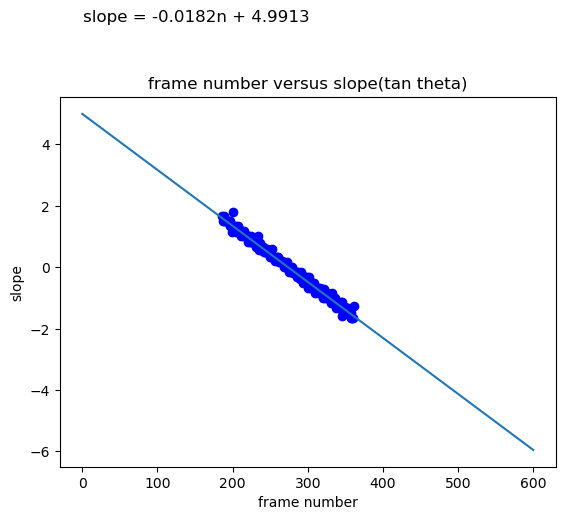

In [ ]:
# Fitting a linear regression line to the coordinates
coefficients = np.polyfit(frame_nos[:-1], delta_ratio, 1)
m, b = coefficients

# Generating x values for the plot
n = np.linspace(0, 600, 100)

# Calculating y values based on the linear equation
slope = m * n + b

# Since, launch angle is 60degrees implying slope is sqare root 3 at launch, finding the frame number when the launch occurred.

print("Frame number when slope is root 3")

print ( round((np.sqrt(3) - b ) / m) )

# Plotting the linear graph
plt.plot(n, slope, label='Linear Graph')

# Plotting the original coordinates
plt.scatter(frame_nos[:-1], delta_ratio, color='blue', label='Coordinates')

# Printing the equation on the graph
equation = f"slope = {m:.4f}n + {b:.4f}"
plt.text(1, 8, equation, fontsize=12)

plt.xlabel('frame number')
plt.ylabel('slope')
plt.title('frame number versus slope(tan theta)')
plt.show()


**CELL6: PLOTTING FRAME NUMBER vs X graph . HENCE FINDING X co-ordinate OF LAUNCH ORIGIN OF THE PROJECTILE**

We use np.polyfit to fit a linear regression line to the frame_nos and x_coords data points. The number 1 passed as the second argument specifies that a linear equation (degree 1) should be fitted. The resulting coefficients are stored in the coefficients variable.

The coefficients are unpacked into m (slope) and b (y-intercept).

The code generates n values using np.linspace to create 100 evenly spaced values between 0 and 600. These n values will be used as the x-values for the linear graph.

It calculates the corresponding x-values (x) based on the linear equation x = m * n + b.

We calculate the x-value when the frame number is 179 by substituting the frame number into the linear equation (m * 179) + b. It rounds the result to the nearest integer.

The linear graph is plotted using plt.plot, where n is used as the x-values and x as the y-values.

The x value where frame number is 179 :
6


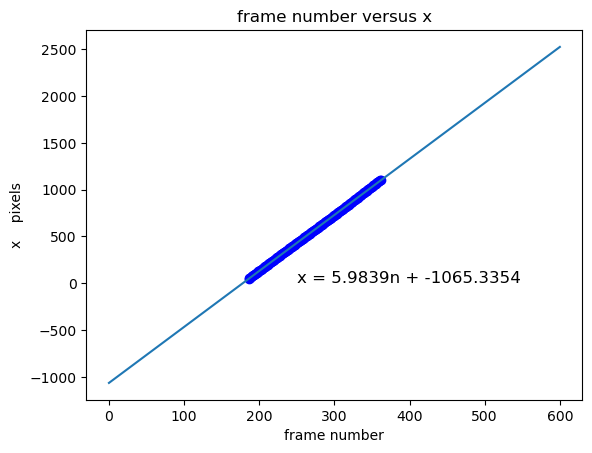

In [ ]:
# Fitting a linear regression line to the coordinates
coefficients = np.polyfit(frame_nos, x_coords, 1)
m, b = coefficients

# Generating x values for the plot
n = np.linspace(0, 600, 100)

# Calculating x values based on the linear equation
x = m * n + b

print("The x value where frame number is 179 :")
print( round((m * 179) + b))

# Plotting the linear graph
plt.plot(n, x, label='Linear Graph')

# Plotting the original coordinates
plt.scatter(frame_nos, x_coords, color='blue', label='Coordinates')

# Printing the equation on the graph
equation = f"x = {m:.4f}n + {b:.4f}"
plt.text(250, 8, equation, fontsize=12)

plt.xlabel('frame number')
plt.ylabel('x    pixels')
plt.title('frame number versus x')
plt.show()


**CELL7: PLOTTING FRAME NUMBER versus Y co-ordinate . HENCE FINDING Y co-ordinate OF THE LAUNCH ORIGIN OF THE PROJECTILE**

We use np.polyfit to fit a quadratic curve to the frame_nos and y_coords data points. The number 2 passed as the second argument specifies that a quadratic equation (degree 2) should be fitted. The resulting coefficients are stored in the coefficients variable.

The coefficients are unpacked into a, b, and c, representing the coefficients of the quadratic equation y = a * n^2 + b * n + c.

The code generates n values using np.linspace to create 100 evenly spaced values between 150 and 400. These n values will be used as the x-values for the curve plot.

It calculates the corresponding y-values (y) based on the quadratic equation y = a * n^2 + b * n + c.

We calculate the y-value when the frame number is 179 by substituting the frame number into the quadratic equation (a * 179 * 179) + (b * 179) + c. It rounds the result to the nearest integer,found to be -65.

The curve is plotted using plt.plot, where n is used as the x-values and y as the y-values.

Value of Y co ordinate when frame number is 179:
-65


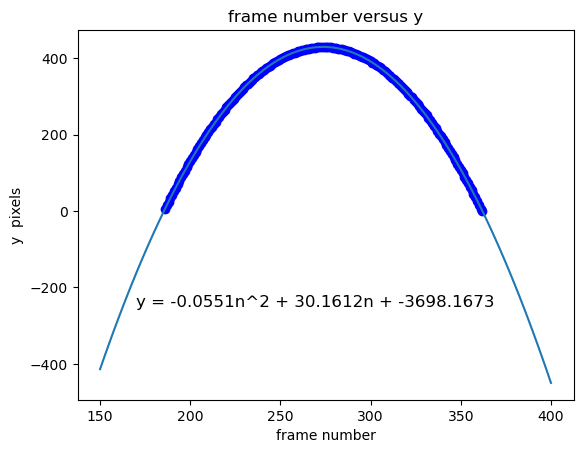

In [ ]:
# Fitting a quadratic curve to the coordinates
coefficients = np.polyfit(frame_nos, y_coords, 2)
a, b, c = coefficients

# Generating x values for the plot
n = np.linspace(150, 400, 100)

# Calculating y values based on the quadratic equation
y = a * n**2 + b * n + c

print("Value of Y co ordinate when frame number is 179:")
print( round( (a * 179 * 179) + (b * 179) + c  ))

# Plotting x versus y
plt.plot(n, y)
plt.scatter(frame_nos, y_coords, color='blue', label='Coordinates')

# Printing the equation on the graph
equation = f"y = {a:.4f}n^2 + {b:.4f}n + {c:.4f}"
plt.text(170,-250, equation, fontsize=12)

plt.xlabel('frame number')
plt.ylabel('y  pixels')
plt.title('frame number versus y')
plt.show()


**CELL8: PLOTTING X vs Y GRAPH**

We fit a quadratic curve to a set of coordinates (x_coords, y_coords) using np.polyfit() function from the NumPy library. It then generates x values for the plot using np.linspace() function and calculates y values based on the quadratic equation.

To find the x coordinates where y = -65, we can use the solve_quadratic() function. This function takes the coefficients of the quadratic equation (a, b, c) and returns the real roots of the equation. In this case, we can pass the coefficients (a, b, c+65) to find the x coordinates where y = -65 (since the y-coordinate in the equation is c+65). The roots will give you the x values x1 and x2.

(5.0483387419294905, 1143.074984249797)


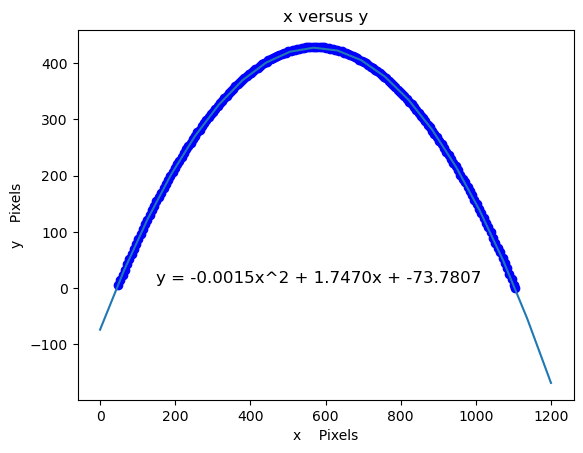

In [ ]:
import math

# Fitting a quadratic curve to the coordinates
coefficients = np.polyfit(x_coords, y_coords, 2)
a, b, c = coefficients

# Generating x values for the plot
x = np.linspace(0, 1200, 20)

# Calculating y values based on the quadratic equation
y = a * x**2 + b * x + c


# Launch Origin is found to be at (6,-65) .
# Finding Horizantal Range
# Finding X co ordinates where y = - 65 using the equation.

def solve_quadratic(a, b, c):
    """
    Solves a quadratic equation of the form ax^2 + bx + c = 0.

    Parameters:
        a (float): Coefficient of x^2.
        b (float): Coefficient of x.
        c (float): Constant term.

    Returns:
        tuple or None: A tuple containing the real roots of the quadratic equation
        if they exist. If the equation has no real roots, None is returned.
    """
    # Calculating the discriminant
    discriminant = b**2 - 4*a*c

    # Check if the equation has real roots
    if discriminant < 0:
        return None  # No real roots exist

    # Calculating the roots
    root1 = (-b + math.sqrt(discriminant)) / (2*a)
    root2 = (-b - math.sqrt(discriminant)) / (2*a)

    return root1, root2

roots = solve_quadratic(a,b,c+65)

print (roots)




# Plotting x versus y
plt.plot(x, y)
plt.scatter(x_coords, y_coords, color='blue', label='Coordinates')

# Printing the equation on the graph
equation = f"y = {a:.4f}x^2 + {b:.4f}x + {c:.4f}"
plt.text(150, 10, equation, fontsize=12)

plt.xlabel('x    Pixels')
plt.ylabel('y    Pixels')
plt.title('x versus y')
plt.show()


**If we subtract the two X co-ordinates, we get the Range of the projectile. 1143.075 - 5.0483 = 1138.0267 PIXELS is the RANGE of projectile.
Converting pixels into meters, since the scale is 797 pixels/meter : 1138.0267/797=1.42788 Meters is the RANGE of projectile.**

**X co-ordinate of MAXIMUM HEIGHT is the midpoint of the above two X co-ordinates founded. So (5.0483+1143.075)/2 = 574.06 pixels**

In [ ]:
#Substituting the X co-ordinate in the above quadratic expression and
#Calculating the Maximum Height in meters since the scale is 797pixels/meter:

((-0.0015 * 574.06 * 574.06) + ( 1.7470 * 574.06) - 73.7807 )/797

0.5455267184441657

**0.546 meters is the Maximum Height of the Projectile**

**CELL9:PLOTTING FRAME NUMBER VERSUS delta_x GRAPH**

We use np.polyfit to perform a least squares polynomial fit to the data. It fits a first-degree polynomial (linear regression line) to the frame_nos and delta_x data points and returns the coefficients m (slope) and b (intercept) of the line.

Here, np.linspace creates an array of 100 equally spaced values between 0 and 600. These will be used as x values for the linear equation.

The equation (dx = m * n + b) calculates the y values (dx) based on the linear equation y = mx + b, where m is the slope and b is the intercept obtained from the linear regression.

We use plt.plot to plot the linear graph using the 'n' values as x-coordinates and 'dx' values as y-coordinates.


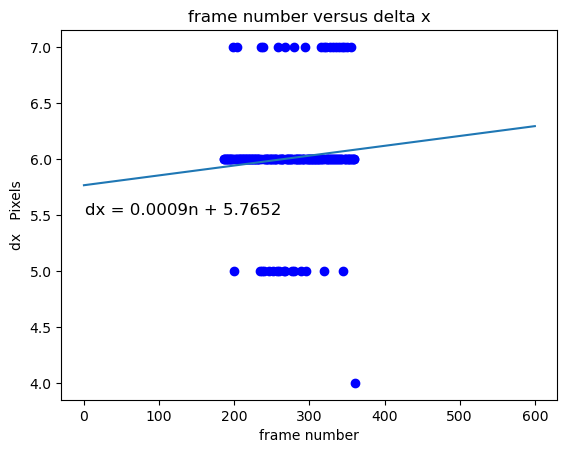

In [ ]:
# Fitting a linear regression line to the coordinates
coefficients = np.polyfit(frame_nos[:-1], delta_x, 1)
m, b = coefficients

# Generating x values for the plot
n = np.linspace(0, 600, 100)

# Calculating y values based on the linear equation
dx = m * n + b

# Plotting the linear graph
plt.plot(n, dx, label='Linear Graph')

# Plotting the original coordinates
plt.scatter(frame_nos[:-1], delta_x, color='blue', label='Coordinates')

# Printing the equation on the graph
equation = f"dx = {m:.4f}n + {b:.4f}"
plt.text(1,5.5, equation, fontsize=12)

plt.xlabel('frame number')
plt.ylabel('dx   Pixels')
plt.title('frame number versus delta x')
plt.show()

**Horizantal velocity of the projectile is 5.7652 pixels/frame**

In [ ]:
#Converting Horizantal velocity which is in pixel/frame into meters/sec using the information that,
#scale 797 pixles/meter and frames recorded at 266.3FPS

(5.7652/ 797 ) / (1/266.3)

1.9263146298619827

**1.93 meters/sec is the Horizantal Velocity.**

**CELL10: PLOTTING THE FRAME NUMBER VERSUS delta_y GRAPH**

We calculate the coefficients m (slope) and b (intercept) by fitting a linear regression line to the frame_nos and delta_y data points using np.polyfit.

np.linspace generates an array of 100 equally spaced values between 0 and 600. These values will be used as x-coordinates for the linear equation.

The equation (dy = m * n + b)  calculates the y values (dy) based on the linear equation y = mx + b using the slope (m) and intercept (b) obtained from the linear regression.

We use plt.plot to plot the linear graph with 'n' values as x-coordinates and 'dy' values as y-coordinates. It also uses plt.scatter to plot the original coordinates from frame_nos and delta_y arrays.

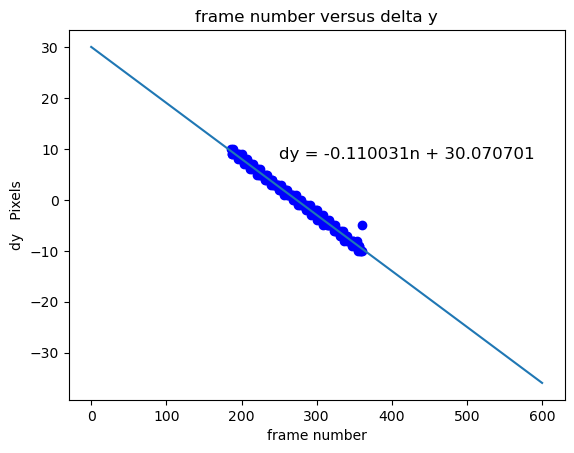

In [ ]:
# Fitting a linear regression line to the coordinates
coefficients = np.polyfit(frame_nos[:-1], delta_y, 1)
m, b = coefficients

# Generating x values for the plot
n = np.linspace(0, 600, 100)

# Calculating y values based on the linear equation
dy = m * n + b

# Plotting the linear graph
plt.plot(n, dy, label='Linear Graph')

# Plotting the original coordinates
plt.scatter(frame_nos[:-1], delta_y, color='blue', label='Coordinates')

# Printing the equation on the graph
equation = f"dy = {m:.6f}n + {b:.6f}"
plt.text(250, 8, equation, fontsize=12)

plt.xlabel('frame number')
plt.ylabel('dy   Pixels')
plt.title('frame number versus delta y')
plt.show()

**Since this is the graph of vertical velocity, slope of this graph gives accelaration due to gravity g = -0.110031 pixel/ frame squared**

In [ ]:
#Converting g value which is in pixel/frame squared to meter/sec squared, using the information that,
#scale 797 pixles/meter and frames recorded at 266.3FPS

(-0.110031 / 797 ) / (1/(266.3 * 266.3))

-9.79036924264743

**The g value was found by video analysis to be 9.8 meter/second square**

**FINAL RESULTS OF THE VIDEO ANALYSIS BY IMAGE THRESHOLDING METHOD INTO BINARY (B&W) COLOURS :**
***

**The g value was found by video analysis to be 9.79 meter/second square.**

**The Horizantal Velocity of Projectile = 1.93 meters/sec.**

**The Maximum Height of the Projectile = 0.546 meters**

**The Horizantal Range of the Projectile = 1.42788 Meters**

